## Define the Hamiltonian

In [3]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

def haldane_honeycomb(t1, t2, m, phi, kx, ky):

    k = np.array([kx, ky])

    a1 = np.sqrt(3)*np.array([np.sqrt(3) * 0.5, 0.5])
    a2 = np.sqrt(3)*np.array([0, -1])
    a3 = np.sqrt(3)*np.array([-np.sqrt(3) * 0.5, 0.5])

    b1 = a2 - a3
    b2 = a3 - a1
    b3 = a1 - a2

    pauli0 = np.eye(2)
    pauli1 = np.array([[0, 1], [1, 0]])
    pauli2 = np.array([[0, -1j], [1j, 0]])
    pauli3 = np.array([[1, 0], [0, -1]])

    hk = 2 * t2 * np.cos(phi) * (
            np.cos(k @ b1) + np.cos(k @ b2) + np.cos(k @ b3)
    ) * pauli0 + t1 * (
            (np.cos(k @ a1) + np.cos(k @ a2) + np.cos(k @ a3)) * pauli1 +
            (np.sin(k @ a1) + np.sin(k @ a2) + np.sin(k @ a3)) * pauli2
    ) + (m - 2 * t2 * np.sin(phi) * (
            np.sin(k @ b1) + np.sin(k @ b2) + np.sin(k @ b3)
    )) * pauli3

    return hk

## Plot the dispersion relation

In [4]:
def get_eigen(t1, t2, m, phi, kx, ky):
    hk = haldane_honeycomb(t1, t2, m, phi, kx, ky)
    E,states=np.linalg.eigh(hk)
    return E[0],E[1],states

In [5]:
def band_plot(band_id,m,phi,t2,kxmax,kymax,A):  
    t1=1

    xmom=np.linspace(0,kxmax,100)
    ymom=np.linspace(0,kymax,100)

    En_lower=[]
    En_upper=[]
    for kx in xmom:
        for ky in ymom:
            E_lower,E_upper,states = get_eigen(t1, t2, m, phi, kx, ky)
            En_lower.extend([E_lower])
            En_upper.extend([E_upper])

    Energy_lower=np.transpose(np.reshape(En_lower,(len(xmom),len(ymom))))
    Energy_upper=np.transpose(np.reshape(En_upper,(len(xmom),len(ymom))))
    
    if band_id==0:
        plt.contourf(xmom, ymom, Energy_lower, 15, cmap='RdBu')
        plt.xlim(0,A[0])
        plt.ylim(0,A[1])
        plt.colorbar();
        #plt.savefig("Haldane_contour_m="+str(m)+"phi="+str(phi)+"t2="+str(t2)+".pdf")
        plt.savefig("Haldane_contour_lower.pdf")
    elif band_id==1:
        plt.contourf(xmom, ymom, Energy_upper, 15, cmap='RdBu')
        plt.xlim(0,A[0])
        plt.ylim(0,A[1])
        plt.colorbar();
        #plt.savefig("Haldane_contour_m="+str(m)+"phi="+str(phi)+"t2="+str(t2)+".pdf")
        plt.savefig("Haldane_contour_upper.pdf")
    elif band_id==-1:
        plt.contourf(xmom, ymom, Energy_upper-Energy_lower, 15, cmap='RdBu')
        plt.xlim(0,A[0])
        plt.ylim(0,A[1])
        plt.colorbar();
        #plt.savefig("Haldane_contour_m="+str(m)+"phi="+str(phi)+"t2="+str(t2)+".pdf")
        plt.savefig("Haldane_contour_diff.pdf")

In [ ]:
%matplotlib notebook
band_plot(0,4.5,np.pi/3,1,3,5,[3,5])

In [ ]:
El,Eu,psi=get_eigen(1,1,4.5,np.pi/3,0.7,1.2)

In [41]:
def ThreeDband_plot(m,phi,t2,kxmax,kymax,A):  
    t1=1

    xmom=np.linspace(0,kxmax,100)
    ymom=np.linspace(0,kymax,100)

    En_lower=[]
    En_upper=[]
    for kx in xmom:
        for ky in ymom:
            E_lower,E_upper,states = get_eigen(t1, t2, m, phi, kx, ky)
            En_lower.extend([E_lower])
            En_upper.extend([E_upper])

    Energy_lower=np.transpose(np.reshape(En_lower,(len(xmom),len(ymom))))
    Energy_upper=np.transpose(np.reshape(En_upper,(len(xmom),len(ymom))))
    
    fig = pl.figure()
    
    ax = fig.gca(projection='3d')
    
    kx = np.linspace(0,kxmax, 100)
    ky = np.linspace(0,kymax, 100)
    kx, ky = np.meshgrid(kx,ky)
    surf = ax.plot_surface(kx, ky, Energy_lower,linewidth=0, cmap="coolwarm")
    #surf2 = ax.plot_surface(kx, ky, Energy_upper,linewidth=0, cmap="coolwarm")
    plt.show()

<IPython.core.display.Javascript object>


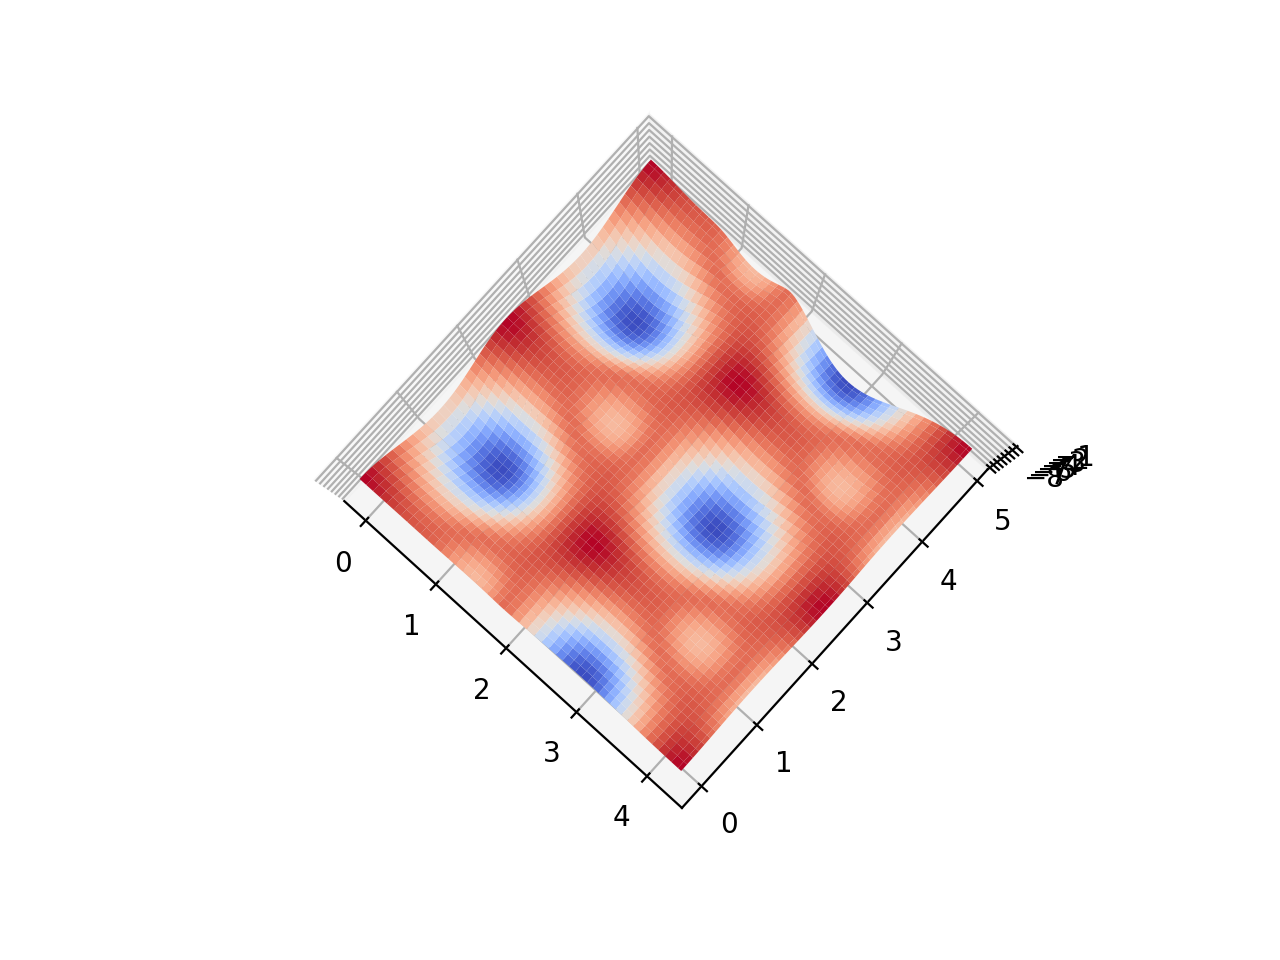

In [42]:
%matplotlib notebook
ThreeDband_plot(2.5,np.pi/3,1,2*2*np.pi/3,2*4*np.pi/(3*np.sqrt(3)),[2*2*np.pi/3,2*4*np.pi/(3*np.sqrt(3))])

In [ ]:
El

In [ ]:
t1=t2=1
m=4.5
phi=np.pi/3

xmom=np.linspace(0,5,6)
ymom=np.linspace(0,5,6)

En_lower=[]
En_upper=[]

for kx in xmom:
    for ky in ymom:
        E_lower,E_upper,states = get_eigen(t1, t2, m, phi, kx, ky)
        En_lower.extend([E_lower])
        En_upper.extend([E_upper])

Energy_lower=np.reshape(En_lower,(len(xmom),len(ymom)))
Energy_upper=np.reshape(En_upper,(len(xmom),len(ymom)))

In [ ]:
kx,ky=np.meshgrid(xmom,ymom)

In [ ]:
def f(x,y):
    return x*y+x

In [ ]:
f(kx,ky)

In [ ]:
kx

In [ ]:
ky

In [ ]:
e=[]
for x in xmom:
    for y in ymom:
        e.extend([f(x,y)])

In [ ]:
e

In [ ]:
np.transpose((np.reshape(e,(6,6))))

In [ ]:
round(0.9)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Make some illustrative fake data:

x = np.arange(0, np.pi, 0.1)
y = np.arange(0, 2 * np.pi, 0.1)
X, Y = np.meshgrid(x, y)
Z = np.cos(X) * np.sin(Y) * 10

In [68]:
colors = [(0.3651427346666667, 0.4869028524444445, 0.9024269673333334), (1,1,1), (0.9452544436666667, 0.5574277972222224, 0.43952504288888905)]  # R -> G -> B
cmap_name = 'my_list'
cm = LinearSegmentedColormap.from_list(
        cmap_name, colors, N=3)

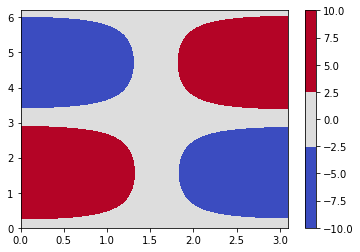

In [73]:
%matplotlib inline
plt.contourf(X,Y,Z,cmap=cmap)
plt.colorbar();

In [72]:
from pylab import *
cmap = cm.get_cmap('coolwarm', 3)